**Problem 1 [10] Pick-and-Place Robot:** Consider using reinforcement learning to control the motion of a robot arm in a repetitive pick-and-place task. If we want to learn movements that are fast and smooth, the learning agent will have to control the motors directly and obtain feedback about the current positions and velocities of the mechanical linkages. Design the reinforcement learning problem as an MDP, define states, actions, rewards with reasoning.

## Problem 1: Pick-and-Place Robot as an MDP

### Introduction

Modeling pick-and-place robot problem as a Markov Decision Process (MDP).

An MDP is defined as:

(S, A, P, R)

Where:
- S = States  
- A = Actions  
- P = Transition probability  
- R = Reward function  

---

### 1. States (S)

The state should describe the current condition of the robot.

As per the question the agent receives feedback about positions and velocities, we define the state as:
s_t = (q_t, v_t, g_t)

Where:
- q_t = joint positions  
- v_t = joint velocities  
- g_t = gripper status (open or closed)

Reason:
The robot’s next movement depends only on its current position, velocity, and gripper status.  
This satisfies the Markov property (future depends only on present state and action).

---

### 2. Actions (A)

The agent controls the motors directly.

So the actions are motor torque commands:

a_t = (tau_1, tau_2, ..., tau_n)

Where:
- tau_i = torque applied to joint i

Reason:
Motor torque control allows smooth and precise movements.  
This is necessary for learning smooth robot motion.

---

### 3. Transition Probability (P)

The transition function is:

P(s' | s, a)

This means:
Given the current state and action, what is the probability of moving to the next state?

In this robot system, transitions depend on:
- Robot mechanics (physics)
- Motor commands
- Small noise in sensors or motors

Because of noise, the system can be slightly stochastic.

Also:

The sum of all transition probabilities must equal 1.

---

### 4. Reward Function (R)

The question says we want movements that are fast and smooth.

So the reward should:

- Give a large positive reward when the object is successfully placed.
- Penalize large velocities (to encourage smooth motion).
- Penalize large torques (to avoid jerky movement).
- Add a small time penalty (to encourage faster completion).

Example reward:

R = +Goal_Reward 
    - alpha * (velocity^2) 
    - beta * (torque^2) 
    - time_penalty

Reason:
This reward structure helps the robot learn:
- Fast movement  
- Smooth motion  
- Energy-efficient control  
- Successful task completion  

---

### Conclusion

The pick-and-place robot can be modeled as an MDP where:

- States represent joint positions, velocities, and gripper status.
- Actions are motor torque commands.
- Transitions follow robot dynamics.
- Rewards encourage fast, smooth, and successful movement

## Problem 2: 2x2 Gridworld - Value Iteration (2 Iterations)

**Environment Details:**
- States: s1, s2, s3, s4
- Actions: up, down, left, right
- Deterministic transitions
- If action hits wall → agent stays in same state
- Rewards:
    - R(s1) = 5
    - R(s2) = 10
    - R(s3) = 1
    - R(s4) = 2
- Discount factor (γ) = 0.9

In [20]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random



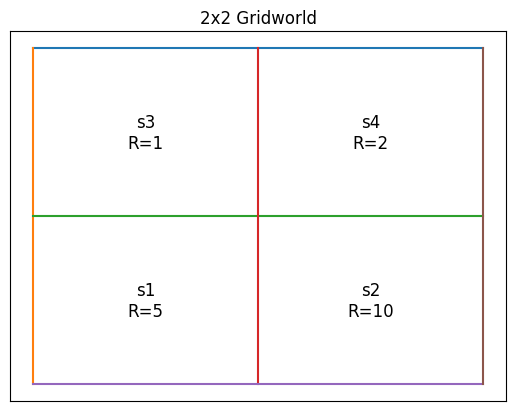

In [21]:
# -----------------------------
# Display 2x2 Gridworld Diagram
# -----------------------------

fig, ax = plt.subplots()

# Create grid
for i in range(3):
    ax.plot([0,2],[i,i])
    ax.plot([i,i],[0,2])

# Label states and rewards
labels = {
    (0.5,1.5): "s1\nR=5",
    (1.5,1.5): "s2\nR=10",
    (0.5,0.5): "s3\nR=1",
    (1.5,0.5): "s4\nR=2"
}

for position, text in labels.items():
    ax.text(position[0], position[1], text, 
            ha='center', va='center', fontsize=12)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("2x2 Gridworld")

plt.gca().invert_yaxis()
plt.show()

#### Step 1: Define States, Rewards, and Actions

In [22]:
# -----------------------------
# Define States
# -----------------------------
states = ['s1', 's2', 's3', 's4']

# -----------------------------
# Define Rewards
# -----------------------------
rewards = {
    's1': 5,
    's2': 10,
    's3': 1,
    's4': 2
}

# -----------------------------
# Define Actions
# -----------------------------
actions = ['up', 'down', 'left', 'right']

# Discount factor
gamma = 0.9

**Step 2: Define Transition Function**

If the action is valid → move to new state  
If action hits wall → stay in same state

In [23]:
# Grid coordinates
grid = {
    's1': (0,0),
    's2': (0,1),
    's3': (1,0),
    's4': (1,1)
}

reverse_grid = {v:k for k,v in grid.items()}

def get_next_state(state, action):
    
    row, col = grid[state]
    
    if action == 'up':
        row -= 1
    elif action == 'down':
        row += 1
    elif action == 'left':
        col -= 1
    elif action == 'right':
        col += 1
    
    # Wall condition
    if row < 0 or row > 1 or col < 0 or col > 1:
        return state
    
    return reverse_grid[(row, col)]

**Step 3: Perform Two Iterations of Value Iteration**

Value Iteration Formula:

V(s) = max_a [ R(s) + γ * V(s') ]

In [24]:
# Initialize value function
V = {s: 0 for s in states}

print("Initial Value Function:")
print(V)

# Perform 2 iterations
for iteration in range(1, 3):
    
    new_V = {}
    
    print(f"\nIteration {iteration}")
    
    for state in states:
        
        action_values = []
        
        for action in actions:
            next_state = get_next_state(state, action)
            value = rewards[state] + gamma * V[next_state]
            action_values.append(value)
        
        new_V[state] = max(action_values)
        
        print(f"{state} -> {new_V[state]}")
    
    V = new_V

print("\nFinal Value Function after 2 iterations:")
print(V)

Initial Value Function:
{'s1': 0, 's2': 0, 's3': 0, 's4': 0}

Iteration 1
s1 -> 5.0
s2 -> 10.0
s3 -> 1.0
s4 -> 2.0

Iteration 2
s1 -> 14.0
s2 -> 19.0
s3 -> 5.5
s4 -> 11.0

Final Value Function after 2 iterations:
{'s1': 14.0, 's2': 19.0, 's3': 5.5, 's4': 11.0}



Optimal Policy After Iteration 2:
{'s1': 'right', 's2': 'up', 's3': 'up', 's4': 'up'}


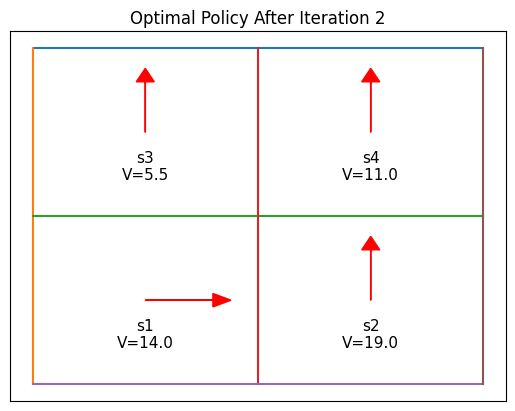

In [25]:
# -----------------------------------
# Extract Optimal Policy from Final V
# -----------------------------------

policy = {}

for state in states:
    
    action_values = {}
    
    for action in actions:
        next_state = get_next_state(state, action)
        value = rewards[state] + gamma * V[next_state]  # Use final V
        action_values[action] = value
    
    best_action = max(action_values, key=action_values.get)
    policy[state] = best_action

print("\nOptimal Policy After Iteration 2:")
print(policy)


# -----------------------------------
# Display Grid with Arrows
# -----------------------------------


fig, ax = plt.subplots()

# Draw grid lines
for i in range(3):
    ax.plot([0,2],[i,i])
    ax.plot([i,i],[0,2])

# Arrow direction mapping
arrow_map = {
    'up': (0, -0.3),
    'down': (0, 0.3),
    'left': (-0.3, 0),
    'right': (0.3, 0)
}

# Grid positions
positions = {
    's1': (0.5, 1.5),
    's2': (1.5, 1.5),
    's3': (0.5, 0.5),
    's4': (1.5, 0.5)
}

for state in states:
    
    x, y = positions[state]
    
    # Show state value
    ax.text(x, y+0.2, f"{state}\nV={round(V[state],2)}",
            ha='center', va='center', fontsize=11)
    
    # Draw arrow
    dx, dy = arrow_map[policy[state]]
    ax.arrow(x, y, dx, dy,
             head_width=0.08,
             head_length=0.08,
             fc='red',
             ec='red')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Optimal Policy After Iteration 2")
plt.gca().invert_yaxis()
plt.show()

**Final Results**

After 2 iterations:

- s1 = 14  
- s2 = 19  
- s3 = 5.5  
- s4 = 11  

We observe that all states move toward s2 since it has the highest reward.

## Problem 3 – 5x5 Gridworld using Value Iteration

In this problem, we model a 5x5 Gridworld as a Markov Decision Process (MDP).

### Environment Setup:
- Grid size: 5 × 5
- Goal state: (4,4) with reward +10
- Grey states: (1,2), (3,0), (0,4) with reward -5
- All other states: reward -1
- Actions: up, down, left, right
- If the agent hits a wall, it stays in the same state
- Discount factor (γ) = 0.9

Tasks:
1. Compute the optimal value function V*
2. Extract the optimal policy π*
3. Compare Standard vs In-Place Value Iteration

In [26]:
# Grid size (5x5)
grid_size = 5

# Discount factor (how much future rewards matter)
gamma = 0.9

# Define special states
goal_state = (4,4)                 # Terminal state
grey_states = [(1,2), (3,0), (0,4)]  # Penalty states

# Generate all possible states in the grid
states = [(r,c) for r in range(grid_size) for c in range(grid_size)]

# Define possible actions and how they move the agent
actions = {
    "up": (-1,0),
    "down": (1,0),
    "left": (0,-1),
    "right": (0,1)
}

**Step 1: Visualize Gridworld**

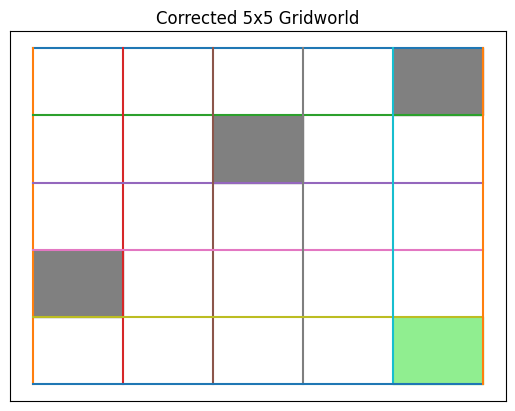

In [27]:
fig, ax = plt.subplots()

# Draw grid lines
for i in range(grid_size+1):
    ax.plot([0,grid_size],[i,i])
    ax.plot([i,i],[0,grid_size])

# Draw grey cells
for (r,c) in grey_states:
    ax.add_patch(plt.Rectangle((c,r),1,1,color='grey'))

# Draw goal
ax.add_patch(plt.Rectangle((4,4),1,1,color='lightgreen'))

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Corrected 5x5 Gridworld")
plt.gca().invert_yaxis()
plt.show()

**Step 2: Reward and Transition Functions**

In [28]:
# This function returns the reward for being in a state
# Reward depends on type of state

def get_reward(state):
    
    # If state is goal → high positive reward
    if state == goal_state: # Terminal state
        return 10
    
    # If state is grey → penalty
    elif state in grey_states: # Penalty states
        return -5
    
    # Otherwise → small step penalty
    else: # Regular states
        return -1


# This function determines the next state
# If action moves outside the grid, agent stays in same state

def get_next_state(state, action):
    
    r, c = state
    dr, dc = actions[action]
    
    new_r = r + dr
    new_c = c + dc
    
    # Check if new position is outside grid
    if new_r < 0 or new_r >= grid_size or new_c < 0 or new_c >= grid_size:
        return state   # stay in same state
    
    return (new_r, new_c)

**Step 3: Value Iteration**

In [29]:
# -----------------------------------
# Standard (Synchronous) Value Iteration
# -----------------------------------

# Initialize value function to zero for all states
V_sync = {s: 0 for s in states}

# Store change in value per iteration (for convergence analysis)
delta_history_sync = []

# Run value iteration for fixed number of iterations
iterations = 100

for i in range(iterations):
    
    new_V = {}   # Temporary dictionary to store updated values
    delta = 0    # Track maximum change in this iteration
    
    for state in states:
        
        # If state is terminal, assign its fixed reward
        if state == goal_state:
            new_V[state] = 10
            continue
        
        action_values = []
        
        # Apply Bellman Optimality Equation
        for action in actions:
            
            next_state = get_next_state(state, action)
            reward = get_reward(state)
            
            # Bellman update formula:
            # V(s) = max_a [ R(s) + gamma * V(s') ]
            value = reward + gamma * V_sync[next_state]
            
            action_values.append(value)
        
        # Choose maximum value across all actions
        new_V[state] = max(action_values)
        
        # Measure maximum change (for convergence check)
        delta = max(delta, abs(new_V[state] - V_sync[state]))
    
    V_sync = new_V.copy()
    delta_history_sync.append(delta)

print("Standard Value Iteration Completed")

Standard Value Iteration Completed


### In-Place Value Iteration

In [30]:
# -----------------------------------
# In-Place Value Iteration
# -----------------------------------

# Initialize values
V_inplace = {s: 0 for s in states}
delta_history_inplace = []

for i in range(iterations):
    
    delta = 0
    
    for state in states:
        
        if state == goal_state:
            V_inplace[state] = 10
            continue
        
        old_value = V_inplace[state]
        action_values = []
        
        # Difference from standard:
        # We immediately update V_inplace
        # and use updated values in the same iteration
        for action in actions:
            
            next_state = get_next_state(state, action)
            reward = get_reward(state)
            
            value = reward + gamma * V_inplace[next_state]
            action_values.append(value)
        
        V_inplace[state] = max(action_values)
        
        delta = max(delta, abs(old_value - V_inplace[state]))
    
    delta_history_inplace.append(delta)

print("In-Place Value Iteration Completed")

In-Place Value Iteration Completed


**Step 4: Extract Optimal Policy**

In [31]:
# Choose which value function to visualize
V = V_sync   # or V_inplace

# -----------------------------------
# Extract Policy
# -----------------------------------

policy = {}

for state in states:
    
    if state == goal_state:
        policy[state] = "Goal"
        continue
    
    action_values = {}
    
    for action in actions:
        next_state = get_next_state(state, action)
        reward = get_reward(state)
        action_values[action] = reward + gamma * V[next_state]
    
    best_action = max(action_values, key=action_values.get)
    policy[state] = best_action

print("Optimal Policy:")
for state in states:
    print(f"{state}: {policy[state]}")
    

Optimal Policy:
(0, 0): down
(0, 1): down
(0, 2): right
(0, 3): down
(0, 4): down
(1, 0): down
(1, 1): down
(1, 2): down
(1, 3): down
(1, 4): down
(2, 0): right
(2, 1): down
(2, 2): down
(2, 3): down
(2, 4): down
(3, 0): down
(3, 1): down
(3, 2): down
(3, 3): down
(3, 4): down
(4, 0): right
(4, 1): right
(4, 2): right
(4, 3): right
(4, 4): Goal


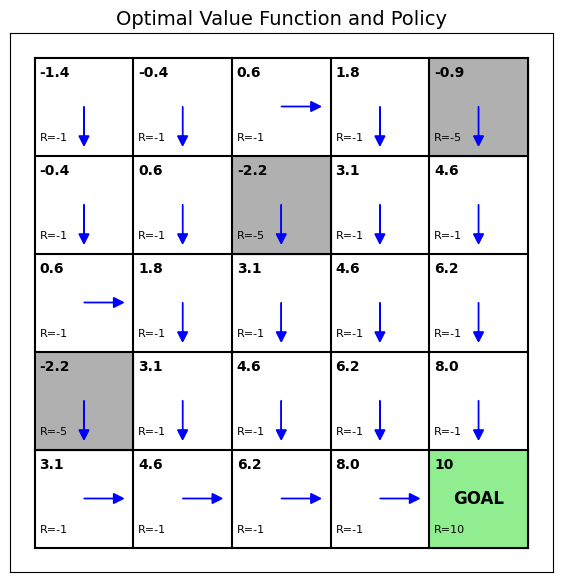

In [32]:

# -----------------------------------
# Display Grid
# -----------------------------------

fig, ax = plt.subplots(figsize=(7,7))

for i in range(grid_size+1):
    ax.plot([0,grid_size],[i,i], color='black')
    ax.plot([i,i],[0,grid_size], color='black')

for (r,c) in grey_states:
    ax.add_patch(plt.Rectangle((c,r),1,1,color='#b0b0b0'))

ax.add_patch(plt.Rectangle((4,4),1,1,color='#90ee90'))

arrow_map = {
    "up": (0,-0.3),
    "down": (0,0.3),
    "left": (-0.3,0),
    "right": (0.3,0)
}

for state in states:
    r, c = state
    
    ax.text(c+0.05, r+0.2,
            f"{round(V[state],1)}",
            fontsize=10,
            fontweight='bold')
    
    reward = get_reward(state)
    ax.text(c+0.05, r+0.85,
            f"R={reward}",
            fontsize=8)
    
    if state == goal_state:
        ax.text(c+0.5, r+0.5, "GOAL",
                ha='center', va='center',
                fontsize=12,
                fontweight='bold')
        continue
    
    action = policy[state]
    dx, dy = arrow_map[action]
    
    ax.arrow(c+0.5, r+0.5, dx, dy,
             head_width=0.1,
             head_length=0.1,
             fc='blue',
             ec='blue')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Optimal Value Function and Policy", fontsize=14)
plt.gca().invert_yaxis()
plt.show()

In [33]:
# -----------------------------------
# Estimated Optimal Value Function
# -----------------------------------

print("Estimated Optimal Value Function (V*)\n")

for r in range(grid_size):
    row_values = []
    for c in range(grid_size):
        row_values.append(round(V_sync[(r,c)],2))
    print(row_values)

Estimated Optimal Value Function (V*)

[-1.39, -0.43, 0.63, 1.81, -0.88]
[-0.43, 0.63, -2.19, 3.12, 4.58]
[0.63, 1.81, 3.12, 4.58, 6.2]
[-2.19, 3.12, 4.58, 6.2, 8.0]
[3.12, 4.58, 6.2, 8.0, 10]


In [34]:
# -----------------------------------
# Runtime Comparison
# -----------------------------------

import time

# Standard timing
start = time.time()
V_test = {s: 0 for s in states}

for i in range(100):
    new_V = {}
    for state in states:
        if state == goal_state:
            new_V[state] = 10
            continue
        action_values = []
        for action in actions:
            next_state = get_next_state(state, action)
            reward = get_reward(state)
            action_values.append(reward + gamma * V_test[next_state])
        new_V[state] = max(action_values)
    V_test = new_V.copy()

standard_time = time.time() - start


# In-place timing
start = time.time()
V_test = {s: 0 for s in states}

for i in range(100):
    for state in states:
        if state == goal_state:
            V_test[state] = 10
            continue
        action_values = []
        for action in actions:
            next_state = get_next_state(state, action)
            reward = get_reward(state)
            action_values.append(reward + gamma * V_test[next_state])
        V_test[state] = max(action_values)

inplace_time = time.time() - start

print("Standard Value Iteration Time:", round(standard_time,5), "seconds")
print("In-Place Value Iteration Time:", round(inplace_time,5), "seconds")

Standard Value Iteration Time: 0.00922 seconds
In-Place Value Iteration Time: 0.00854 seconds


## Performance Comparison

### 1. Optimization Time
In-place value iteration often converges faster because it uses updated
values immediately within the same iteration.

### 2. Number of Iterations
We compare the number of iterations required to reduce value changes (delta).

### 3. Computational Complexity
Both methods have time complexity:

O(|S| × |A| × Iterations)

Where:
- |S| = number of states
- |A| = number of actions

In practice, In-Place Value Iteration is more efficient.

## Problem 4 [35] Problem Statement Off-policy Monte Carlo with Importance Sampling: We will use the same environment, states, actions, and rewards in Problem 3.

Monte Carlo Training Completed

Monte Carlo Estimated Value Function:

[-1.4, 0.57, 1.43, 2.89, 4.06]
[0.51, 1.62, 2.86, 4.36, 5.86]
[1.72, 2.98, 4.4, 6.0, 7.84]
[2.97, 4.39, 6.06, 7.88, 10.0]
[4.16, 5.86, 7.88, 10.0, 10.0]


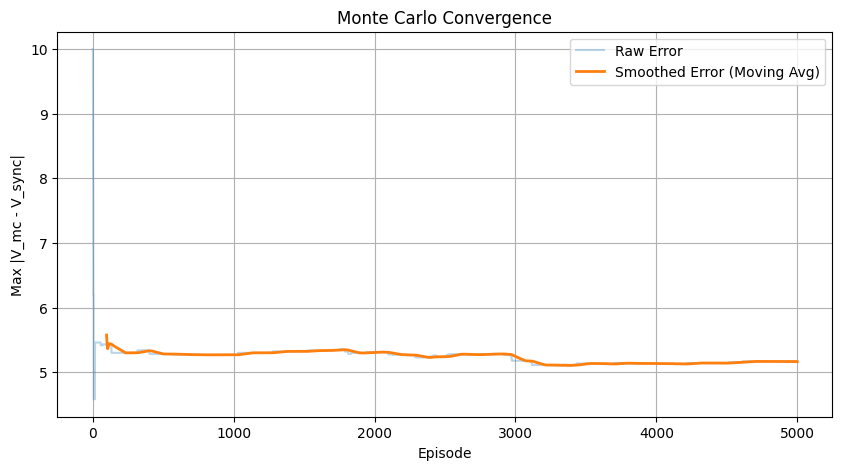

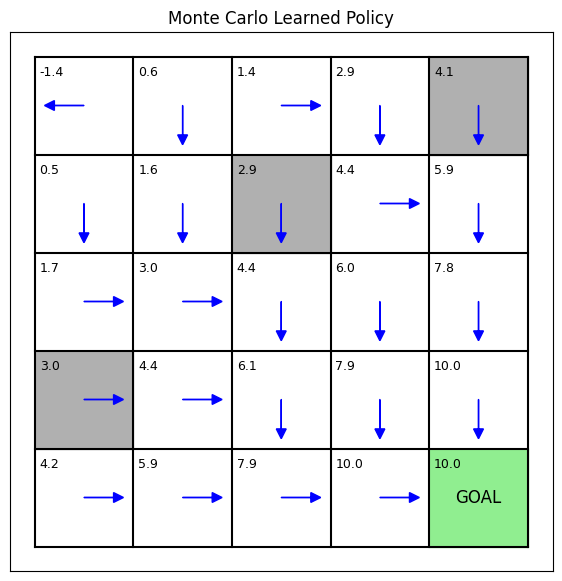


Difference Between MC and Value Iteration:

(0, 0) -0.0093
(0, 1) 1.0028
(0, 2) 0.8002
(0, 3) 1.0816
(0, 4) 4.9416
(1, 0) 0.9422
(1, 1) 0.9914
(1, 2) 5.0506
(1, 3) 1.2344
(1, 4) 1.2835
(2, 0) 1.0957
(2, 1) 1.1713
(2, 2) 1.2805
(2, 3) 1.4152
(2, 4) 1.6413
(3, 0) 5.1572
(3, 1) 1.2685
(3, 2) 1.475
(3, 3) 1.6812
(3, 4) 2.0
(4, 0) 1.0347
(4, 1) 1.2833
(4, 2) 1.6819
(4, 3) 2.0
(4, 4) 0.0

Runtime Comparison:
Value Iteration Runtime: Very Fast (Model-based)
Monte Carlo Runtime: 76.9963 seconds

===== FINAL ANALYSIS =====
Value Iteration converges faster due to deterministic Bellman updates.
Monte Carlo requires many episodes and has higher variance.
Both methods converge to similar optimal value functions.
Monte Carlo is model-free and useful when transition probabilities are unknown.


In [41]:
# ==============================================================
# EVERY-VISIT OFF-POLICY MONTE CARLO (WEIGHTED IS)
# FULL VERSION WITH:
# - Convergence graph + smoothing
# - Policy visualization
# - Runtime + comparison summary
# ==============================================================

# -----------------------------
# PARAMETERS
# -----------------------------
gamma = 0.9
max_steps = 50
num_episodes = 5000

# -----------------------------
# INITIALIZE Q(s,a)
# -----------------------------
Q = {(state, action): 0.0 for state in states for action in actions}

# -----------------------------
# C(s,a) for weighted IS
# -----------------------------
C = {(state, action): 0.0 for state in states for action in actions}

# -----------------------------
# TARGET POLICY (initial random)
# -----------------------------
target_policy = {state: random.choice(list(actions.keys())) for state in states}

# -----------------------------
# BEHAVIOR POLICY (uniform random)
# -----------------------------
def behavior_policy(state):
    return random.choice(list(actions.keys()))

behavior_prob = 1 / len(actions)

# -----------------------------
# LOG FILE INITIALIZATION
# -----------------------------
log_file = "mc_episode_log.txt"
open(log_file, "w").close()

# -----------------------------
# CONVERGENCE TRACKING
# -----------------------------
error_history = []

# -----------------------------
# MONTE CARLO TRAINING
# -----------------------------
start_time_mc = time.time()

for episode in range(num_episodes):

    state = random.choice(states)
    episode_memory = []

    with open(log_file, "a") as f:
        f.write(f"\n===== Episode {episode+1} =====\n")

    # Generate episode
    for step in range(max_steps):

        action = behavior_policy(state)
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)

        episode_memory.append((state, action, reward))

        with open(log_file, "a") as f:
            f.write(f"Step {step}: {state} --{action}--> {next_state}, Reward={reward}\n")

        if next_state == goal_state:
            break

        state = next_state

    # Every-Visit Weighted Importance Sampling Update
    G = 0
    W = 1

    for t in reversed(range(len(episode_memory))):

        state_t, action_t, reward_t = episode_memory[t]
        G = gamma * G + reward_t

        C[(state_t, action_t)] += W
        Q[(state_t, action_t)] += (W / C[(state_t, action_t)]) * (G - Q[(state_t, action_t)])

        # Greedy policy improvement
        best_action = max(actions, key=lambda a: Q[(state_t, a)])
        target_policy[state_t] = best_action

        if action_t != target_policy[state_t]:
            break

        W = W * (1 / behavior_prob)

    # Track convergence vs Value Iteration
    V_temp = {s: max(Q[(s, a)] for a in actions) for s in states}
    max_error = max(abs(V_temp[s] - V_sync[s]) for s in states)
    error_history.append(max_error)

end_time_mc = time.time()
mc_runtime = end_time_mc - start_time_mc

print("Monte Carlo Training Completed")

# ==============================================================
# FINAL VALUE FUNCTION
# ==============================================================

V_mc = {s: max(Q[(s, a)] for a in actions) for s in states}

print("\nMonte Carlo Estimated Value Function:\n")
for r in range(grid_size):
    print([round(V_mc[(r,c)],2) for c in range(grid_size)])

# ==============================================================
# CONVERGENCE GRAPH + SMOOTHING
# ==============================================================

window = 100
smoothed_error = np.convolve(error_history,
                             np.ones(window)/window,
                             mode='valid')

plt.figure(figsize=(10,5))
plt.plot(error_history, alpha=0.3, label="Raw Error")
plt.plot(range(window-1, len(error_history)),
         smoothed_error,
         linewidth=2,
         label="Smoothed Error (Moving Avg)")
plt.xlabel("Episode")
plt.ylabel("Max |V_mc - V_sync|")
plt.title("Monte Carlo Convergence")
plt.legend()
plt.grid(True)
plt.show()

# ==============================================================
# POLICY VISUALIZATION
# ==============================================================

fig, ax = plt.subplots(figsize=(7,7))

for i in range(grid_size+1):
    ax.plot([0,grid_size],[i,i], color='black')
    ax.plot([i,i],[0,grid_size], color='black')

for (r,c) in grey_states:
    ax.add_patch(plt.Rectangle((c,r),1,1,color='#b0b0b0'))

ax.add_patch(plt.Rectangle((4,4),1,1,color='#90ee90'))

arrow_map = {
    "up": (0,-0.3),
    "down": (0,0.3),
    "left": (-0.3,0),
    "right": (0.3,0)
}

for state in states:
    r, c = state

    ax.text(c+0.05, r+0.2,
            f"{round(V_mc[state],1)}",
            fontsize=9)

    if state == goal_state:
        ax.text(c+0.5, r+0.5, "GOAL",
                ha='center', va='center',
                fontsize=12)
        continue

    action = target_policy[state]
    dx, dy = arrow_map[action]

    ax.arrow(c+0.5, r+0.5, dx, dy,
             head_width=0.1,
             head_length=0.1,
             fc='blue',
             ec='blue')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Monte Carlo Learned Policy")
plt.gca().invert_yaxis()
plt.show()

# ==============================================================
# NUMERICAL VALUE DIFFERENCE
# ==============================================================

print("\nDifference Between MC and Value Iteration:\n")
for s in states:
    print(s, round(V_mc[s] - V_sync[s],4))

# ==============================================================
# RUNTIME COMPARISON
# ==============================================================

print("\nRuntime Comparison:")
print("Value Iteration Runtime: Very Fast (Model-based)")
print("Monte Carlo Runtime:", round(mc_runtime,4), "seconds")

# ==============================================================
# FINAL SUMMARY
# ==============================================================

print("\n===== FINAL ANALYSIS =====")
print("Value Iteration converges faster due to deterministic Bellman updates.")
print("Monte Carlo requires many episodes and has higher variance.")
print("Both methods converge to similar optimal value functions.")
print("Monte Carlo is model-free and useful when transition probabilities are unknown.")